In [1]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from acquire import get_all_blogs, get_all_news
from prepare import basic_clean, tokenize, remove_stopwords, lemmatize

## Exercises
### 1. Spam Data

### A. Load the spam data set

In [2]:
spam = pd.read_csv('spam.csv',
                  encoding='latin-1',
                  usecols=[0,1])
spam.columns = ['label', 'text']
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam['text_cleaned'] = spam.text.apply(basic_clean)
spam.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [4]:
spam['text_tokenized'] = spam.text_cleaned.apply(tokenize)
spam.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...


In [5]:
spam['text_lemmatized'] = spam.text_tokenized.apply(lemmatize)
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...


In [6]:
spam['text_filtered'] = spam.text_lemmatized.apply(remove_stopwords)
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though


In [7]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in spam.text_filtered]
spam = pd.concat([spam, pd.DataFrame({'words': words})], axis=1)
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]"


In [8]:
spam['doc_length'] = [len(wordlist) for wordlist in spam.words]
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6


### B. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [9]:
spam['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in spam.words]
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6,"[(nahthink, go), (go, usf), (usf, life), (life..."


In [10]:
ham_words = ' '.join(spam[spam.label=='ham'].text_filtered)
spam_words = ' '.join(spam[spam.label=='spam'].text_filtered)
all_words = ' '.join(spam.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [11]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words.split(), 2)).value_counts()
spam_bigrams = pd.Series(nltk.ngrams(spam_words.split(), 2)).value_counts()

top20_ham_bigrams = ham_bigrams.head(20)
top20_spam_bigrams = spam_bigrams.head(20)

In [12]:
spam['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in spam.words]
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6,"[(nahthink, go), (go, usf), (usf, life), (life..."


In [13]:
print('Spam bigrams:')
print(top20_spam_bigrams)
print()
print('Ham bigrams:')
print(top20_ham_bigrams)

Spam bigrams:
(please, call)          43
(customer, service)     27
(po, box)               23
(guaranteed, call)      23
(prize, guaranteed)     22
(i121000, cash)         20
(send, stop)            19
(every, week)           19
(urgent, mobile)        18
(land, line)            18
(await, collection)     18
(valid, 12hrs)          17
(sae, tc)               16
(account, statement)    16
(claim, call)           16
(call, 08000930705)     15
(identifier, code)      15
(call, mobileupd8)      15
(reply, call)           15
(selected, receive)     15
dtype: int64

Ham bigrams:
(sorrycall, later)    33
(let, know)           33
(good, morning)       30
(new, year)           26
(pls, send)           22
(take, care)          21
(good, night)         19
(no, need)            18
(hi, hi)              18
(great, day)          17
(ltgt, min)           16
(dont, know)          15
(happy, new)          15
(last, night)         15
(ok, lor)             14
(not, sure)           14
(like, ltgt)       

In [14]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in top20_ham_bigrams.to_dict().items()}
spam_data = {k[0] + ' ' + k[1]: v for k, v in top20_spam_bigrams.to_dict().items()}

In [15]:
ham_cloud = WordCloud(background_color='white',
                     height=400, width=800).generate_from_frequencies(ham_data)

spam_cloud = WordCloud(background_color='white',
                      height=400, width=800).generate_from_frequencies(spam_data)

(-0.5, 799.5, 399.5, -0.5)

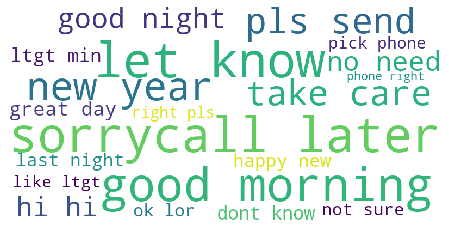

In [16]:
plt.figure(figsize=(8, 4))
plt.imshow(ham_cloud)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

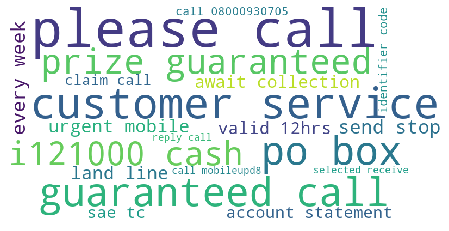

In [17]:
plt.figure(figsize=(8, 4))
plt.imshow(spam_cloud)
plt.axis('off')

**Takeaways:** The spam bigrams have a lot more buisiness oriented language than the ham bigrams. The top bigrams for both spam and ham mention "call" however the ham bigrams either pair it up with "later" or "I'll" which doesn't add urgency to it unlike the spam bigram. The spam bigrams seem to carry a sense of urgency unlike the ham bigrams.

### C. Is there any overlap in the bigrams for the spam data and the ham data?

In [18]:
matching_bigrams = pd.DataFrame()
matching_bigrams['matched_pairs'] = [x for x in spam_bigrams.index if x in ham_bigrams.index]

In [19]:
print(f'There are {len(spam_bigrams)} spam_bigrams')
print(f'There are {len(ham_bigrams)} ham_bigrams')

There are 6568 spam_bigrams
There are 28563 ham_bigrams


In [20]:
print(f'There are {len(matching_bigrams)} matching bigrams.')

There are 130 matching bigrams.


In [21]:
matching_bigrams.head(10)

,matched_pairs
0,"(please, call)"
1,"(customer, service)"
2,"(po, box)"
3,"(every, week)"
4,"(tell, ur)"
5,"(mobile, number)"
6,"(free, call)"
7,"(think, ur)"
8,"(call, free)"
9,"(mobile, no)"


There are 266 bigrams that match from the spam and ham bigrams

### D. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [22]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)

In [23]:
print('Spam Trigrams:')
print(spam_trigrams)
print()
print('Ham Trigrams:')
print(ham_trigrams)

Spam Trigrams:
(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(2003, account, statement)             13
(private, 2003, account)               13
(reply, call, 08000930705)             13
(show, 800, unredeemed)                12
(guaranteed, i121000, cash)            12
(camcorder, reply, call)               12
(bonus, caller, prize)                 11
(anytime, network, min)                11
(every, week, txt)                     11
(please, call, customer)               10
(customer, service, representative)    10
(cash, await, collection)              10
(i122000, bonus, caller)               10
(unredeemed, point, call)               9
(i122000, prize, guaranteed)            9
(contacttoday, draw, show)              9
(750, anytime, network)                 9
dtype: int64

Ham Trigrams:
(happy, new, year)           13
(cant, pick, phone)          12
(phone, right, pls)          12
(right, pls, send)   

In [24]:
ham_tridata = {k[0] + ' ' + k[1]: v for k, v in ham_trigrams.to_dict().items()}
spam_tridata = {k[0] + ' ' + k[1]: v for k, v in spam_trigrams.to_dict().items()}

In [25]:
ham_tricloud = WordCloud(background_color='white',
                     height=400, width=1200).generate_from_frequencies(ham_tridata)

spam_tricloud = WordCloud(background_color='white',
                      height=400, width=1200).generate_from_frequencies(spam_tridata)

Text(0.5, 1.0, 'Ham')

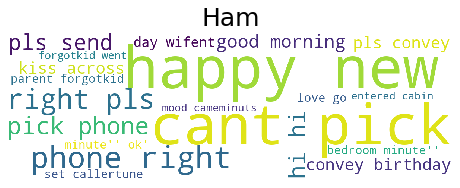

In [26]:
plt.figure(figsize=(8, 4))
plt.imshow(ham_tricloud)
plt.axis('off')
plt.title('Ham', fontsize=25)

Text(0.5, 1.0, 'Spam')

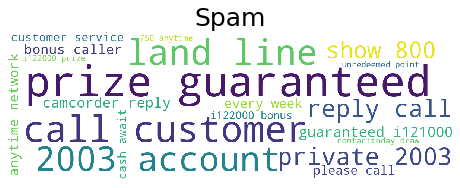

In [27]:
plt.figure(figsize=(8, 4))
plt.imshow(spam_tricloud)
plt.axis('off')
plt.title('Spam', fontsize=25)

Text(0.5, 0, 'Frequency')

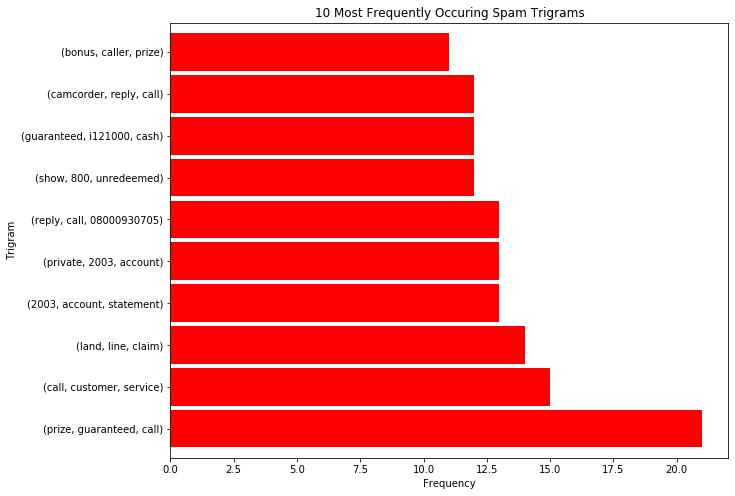

In [28]:
spam_trigrams.head(10).plot.barh(color='red', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring Spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

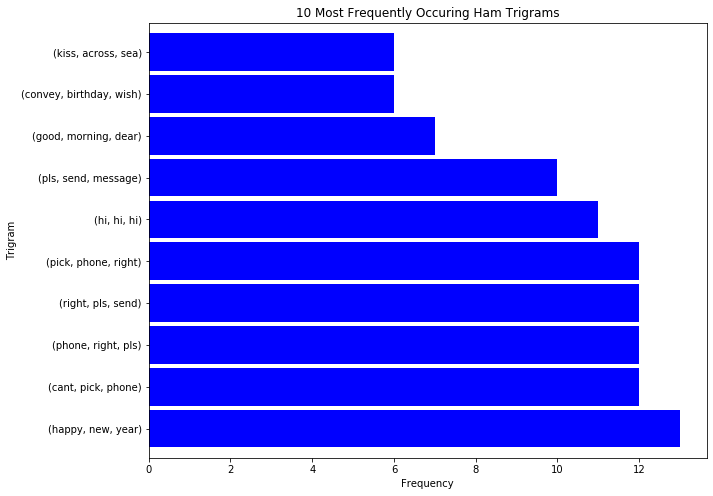

In [29]:
ham_trigrams.head(10).plot.barh(color='blue', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring Ham Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

### Bonus: Plot document length information of spam vs. ham. Does there appear to be a difference?

In [30]:
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6,"[(nahthink, go), (go, usf), (usf, life), (life..."


In [31]:
ham_doclen = spam[spam.label == 'ham'].doc_length
spam_doclen = spam[spam.label == 'spam'].doc_length

In [32]:
print('Top 5 Doc Lengths for Ham Messages:')
print(ham_doclen.value_counts().head(5))
print('Top 5 Doc Lengths for Spam Messages:')
print(spam_doclen.value_counts().head(5))

Top 5 Doc Lengths for Ham Messages:
3    650
4    631
5    565
2    425
6    424
Name: doc_length, dtype: int64
Top 5 Doc Lengths for Spam Messages:
16    87
17    87
18    67
14    64
15    60
Name: doc_length, dtype: int64


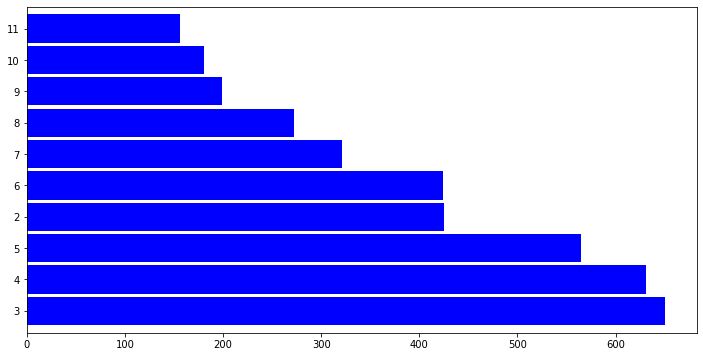

In [33]:
ham_doclen.value_counts().head(10).plot.barh(color='blue', width=.9, figsize=(12, 6))

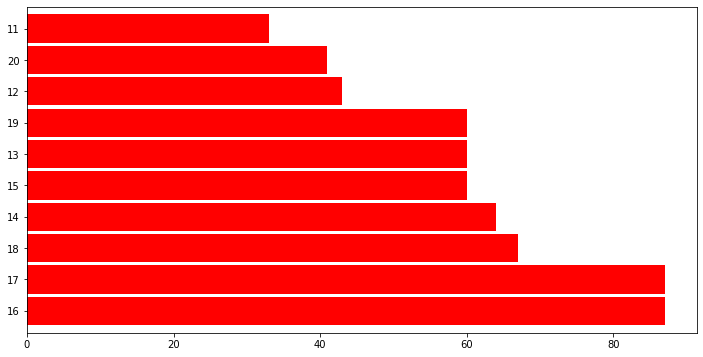

In [34]:
spam_doclen.value_counts().head(10).plot.barh(color='red', width=.9, figsize=(12, 6))

In [35]:
ham_doclen = pd.DataFrame(ham_doclen)
print(f'Percent of ham doc lengths of 4 or lower: {len(ham_doclen[ham_doclen.doc_length <= 4]) / len(ham_doclen)}')

print(f'Percent of ham doc lengths of 10 or lower: {len(ham_doclen[ham_doclen.doc_length <= 10]) / len(ham_doclen)}')

Percent of ham doc lengths of 4 or lower: 0.3861139896373057
Percent of ham doc lengths of 10 or lower: 0.792538860103627


In [36]:
spam_doclen = pd.DataFrame(spam_doclen)
print(f'Percent of spam doc lengths of 16 or greater: {len(spam_doclen[spam_doclen.doc_length >= 16]) / len(spam_doclen)}')

print(f'Percent of spam doc lengths of 10 or greater: {len(spam_doclen[spam_doclen.doc_length >= 10]) / len(spam_doclen)}')

Percent of spam doc lengths of 16 or greater: 0.535475234270415
Percent of spam doc lengths of 10 or greater: 0.8995983935742972


## Blog Data
### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [42]:
blogs = pd.DataFrame(get_all_blogs())

blogs['text_cleaned'] = blogs['article'].apply(basic_clean)
blogs['text_tokenized'] = blogs['text_cleaned'].apply(tokenize)
blogs['text_filtered'] = blogs['text_tokenized'].apply(remove_stopwords)
blogs['text_lemmatized'] = blogs['text_filtered'].apply(lemmatize)

blogs.head()

,title,article,text_cleaned,text_tokenized,text_filtered,text_lemmatized
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumors are true the time has arrived codeu...,rumors true time arrived codeup officially ope...,rumor true time arrived codeup officially open...
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,by dimitri antoniou and maggie giust\ndata sci...,dimitri antoniou maggie giust data science big...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,by dimitri antoniou\na week ago codeup launche...,dimitri antoniou week ago codeup launched imme...,dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,sa tech job fair\nthe third biannual san anton...,sa tech job fair third biannual san antonio te...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,competitor bootcamps closing model danger prog...


In [43]:
blogs.drop(columns=['title'], inplace=True)
blogs

,article,text_cleaned,text_tokenized,text_filtered,text_lemmatized
0,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumors are true the time has arrived codeu...,rumors true time arrived codeup officially ope...,rumor true time arrived codeup officially open...
1,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,by dimitri antoniou and maggie giust\ndata sci...,dimitri antoniou maggie giust data science big...,dimitri antoniou maggie giust data science big...
2,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,by dimitri antoniou\na week ago codeup launche...,dimitri antoniou week ago codeup launched imme...,dimitri antoniou week ago codeup launched imme...
3,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,sa tech job fair\nthe third biannual san anton...,sa tech job fair third biannual san antonio te...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,competitor bootcamps closing model danger prog...


In [52]:
blog_words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in blogs.text_filtered]
blogs = pd.concat([blogs, pd.DataFrame({'words': blog_words})], axis=1)
blogs.head()

,article,text_cleaned,text_tokenized,text_filtered,text_lemmatized,words
0,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumors are true the time has arrived codeu...,rumors true time arrived codeup officially ope...,rumor true time arrived codeup officially open...,"[rumors, true, time, arrived, codeup, official..."
1,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,by dimitri antoniou and maggie giust\ndata sci...,dimitri antoniou maggie giust data science big...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien..."
2,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,by dimitri antoniou\na week ago codeup launche...,dimitri antoniou week ago codeup launched imme...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche..."
3,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,sa tech job fair\nthe third biannual san anton...,sa tech job fair third biannual san antonio te...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an..."
4,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger..."


In [53]:
blogs['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in blogs.words]
blogs.head()

,article,text_cleaned,text_tokenized,text_filtered,text_lemmatized,words,bigrams
0,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumors are true the time has arrived codeu...,rumors true time arrived codeup officially ope...,rumor true time arrived codeup officially open...,"[rumors, true, time, arrived, codeup, official...","[(rumors, true), (true, time), (time, arrived)..."
1,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,by dimitri antoniou and maggie giust\ndata sci...,dimitri antoniou maggie giust data science big...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag..."
2,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,by dimitri antoniou\na week ago codeup launche...,dimitri antoniou week ago codeup launched imme...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,..."
3,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,sa tech job fair\nthe third biannual san anton...,sa tech job fair third biannual san antonio te...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ..."
4,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)..."


In [54]:
blogs['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in blogs.words]
blogs.head()

,article,text_cleaned,text_tokenized,text_filtered,text_lemmatized,words,bigrams,trigrams
0,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumors are true the time has arrived codeu...,rumors true time arrived codeup officially ope...,rumor true time arrived codeup officially open...,"[rumors, true, time, arrived, codeup, official...","[(rumors, true), (true, time), (time, arrived)...","[(rumors, true, time), (true, time, arrived), ..."
1,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,by dimitri antoniou and maggie giust\ndata sci...,dimitri antoniou maggie giust data science big...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi..."
2,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,by dimitri antoniou\na week ago codeup launche...,dimitri antoniou week ago codeup launched imme...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a..."
3,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,sa tech job fair\nthe third biannual san anton...,sa tech job fair third biannual san antonio te...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai..."
4,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,..."


In [60]:
all_blog_words = ' '.join(blogs.text_filtered)
all_blog_words = re.sub(r'\s.\s', '', all_blog_words)

In [61]:
blog_bigrams = pd.Series(nltk.ngrams(all_blog_words.split(), 2)).value_counts()

In [64]:
top20_blog_bigrams = blog_bigrams.head(20)

In [65]:
blog_data = {k[0] + ' ' + k[1]: v for k, v in top20_blog_bigrams.to_dict().items()}

In [66]:
blog_cloud = WordCloud(background_color='white',
                     height=400, width=800).generate_from_frequencies(blog_data)

(-0.5, 799.5, 399.5, -0.5)

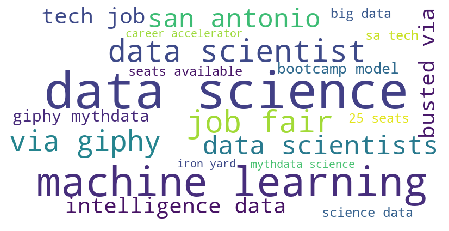

In [67]:
plt.figure(figsize=(8, 4))
plt.imshow(blog_cloud)
plt.axis('off')

Text(0.5, 0, 'Frequency')

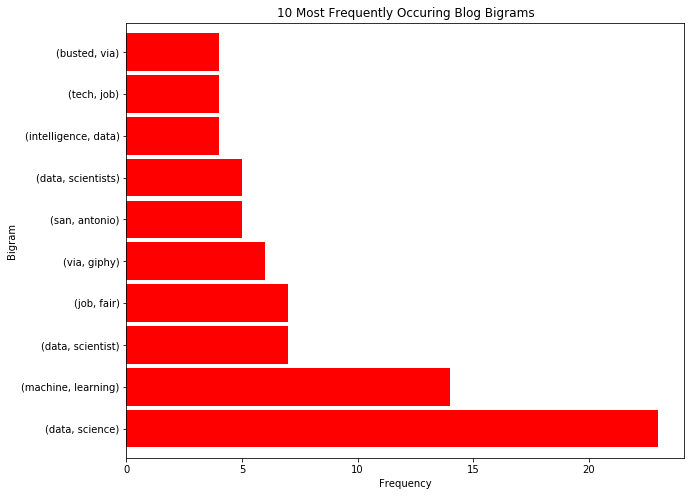

In [74]:
blog_bigrams.head(10).plot.barh(color='red', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring Blog Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

In [68]:
blog_trigrams = pd.Series(nltk.ngrams(all_blog_words.split(), 3)).value_counts()
top20_blog_trigrams = blog_trigrams.head(20)
blog_data = {k[0] + ' ' + k[1]: v for k, v in top20_blog_trigrams.to_dict().items()}
blog_tricloud = WordCloud(background_color='white',
                     height=400, width=800).generate_from_frequencies(blog_data)

(-0.5, 799.5, 399.5, -0.5)

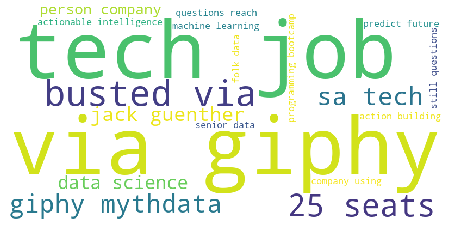

In [69]:
plt.figure(figsize=(8, 4))
plt.imshow(blog_tricloud)
plt.axis('off')

In [70]:
top20_blog_trigrams

(via, giphy, mythdata)              4
(tech, job, fair)                   4
(busted, via, giphy)                4
(25, seats, available)              3
(giphy, mythdata, science)          3
(sa, tech, job)                     3
(jack, guenther, pavilion)          2
(data, science, data)               2
(person, company, using)            2
(actionable, intelligence, data)    2
(programming, bootcamp, model)      2
(machine, learning, data)           2
(company, using, term)              2
(questions, reach, us)              2
(data, science, method)             2
(predict, future, events)           2
(folk, data, science)               2
(senior, data, scientist)           2
(still, questions, reach)           2
(action, building, automations)     2
dtype: int64

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [82]:
news = pd.DataFrame(get_all_news())
news.head()

,title,article,category
0,India lose 7th consecutive international match...,Australia defeated India in the second ODI in ...,sports
1,Tyson reveals he smoked marijuana before throw...,"Boxer Mike Tyson, who returned to ring after 1...",sports
2,F1 driver survives huge crash after car splits...,Formula One driver Romain Grosjean was involve...,sports
3,Warner ruled out of 3rd ODI & T20I series due ...,Opener David Warner was ruled out of the third...,sports
4,Referee saves MMA fighter from nearly flashing...,A video showing referee Jason Herzog saving MM...,sports


In [83]:
news['text_cleaned'] = news.article.apply(basic_clean)
news['text_tokenized'] = news.text_cleaned.apply(tokenize)
news['text_filtered'] = news.text_tokenized.apply(remove_stopwords)
news['text_lemmatized'] = news.text_filtered.apply(lemmatize)

news.head()

,title,article,category,text_cleaned,text_tokenized,text_filtered,text_lemmatized
0,India lose 7th consecutive international match...,Australia defeated India in the second ODI in ...,sports,australia defeated india in the second odi in ...,australia defeated india in the second odi in ...,australia defeated india second odi sydney 51 ...,australia defeated india second odi sydney 51 ...
1,Tyson reveals he smoked marijuana before throw...,"Boxer Mike Tyson, who returned to ring after 1...",sports,boxer mike tyson who returned to ring after 15...,boxer mike tyson who returned to ring after 15...,boxer mike tyson returned ring 15 years exhibi...,boxer mike tyson returned ring 15 year exhibit...
2,F1 driver survives huge crash after car splits...,Formula One driver Romain Grosjean was involve...,sports,formula one driver romain grosjean was involve...,formula one driver romain grosjean was involve...,formula one driver romain grosjean involved hu...,formula one driver romain grosjean involved hu...
3,Warner ruled out of 3rd ODI & T20I series due ...,Opener David Warner was ruled out of the third...,sports,opener david warner was ruled out of the third...,opener david warner was ruled out of the third...,opener david warner ruled third final odi thre...,opener david warner ruled third final odi thre...
4,Referee saves MMA fighter from nearly flashing...,A video showing referee Jason Herzog saving MM...,sports,a video showing referee jason herzog saving mm...,a video showing referee jason herzog saving mm...,video showing referee jason herzog saving mma ...,video showing referee jason herzog saving mma ...


In [84]:
news.drop(columns=['title'], inplace=True)
news.head()

,article,category,text_cleaned,text_tokenized,text_filtered,text_lemmatized
0,Australia defeated India in the second ODI in ...,sports,australia defeated india in the second odi in ...,australia defeated india in the second odi in ...,australia defeated india second odi sydney 51 ...,australia defeated india second odi sydney 51 ...
1,"Boxer Mike Tyson, who returned to ring after 1...",sports,boxer mike tyson who returned to ring after 15...,boxer mike tyson who returned to ring after 15...,boxer mike tyson returned ring 15 years exhibi...,boxer mike tyson returned ring 15 year exhibit...
2,Formula One driver Romain Grosjean was involve...,sports,formula one driver romain grosjean was involve...,formula one driver romain grosjean was involve...,formula one driver romain grosjean involved hu...,formula one driver romain grosjean involved hu...
3,Opener David Warner was ruled out of the third...,sports,opener david warner was ruled out of the third...,opener david warner was ruled out of the third...,opener david warner ruled third final odi thre...,opener david warner ruled third final odi thre...
4,A video showing referee Jason Herzog saving MM...,sports,a video showing referee jason herzog saving mm...,a video showing referee jason herzog saving mm...,video showing referee jason herzog saving mma ...,video showing referee jason herzog saving mma ...


In [85]:
news_words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in news.text_filtered]
news = pd.concat([news, pd.DataFrame({'words': news_words})], axis=1)
news.head()

,article,category,text_cleaned,text_tokenized,text_filtered,text_lemmatized,words
0,Australia defeated India in the second ODI in ...,sports,australia defeated india in the second odi in ...,australia defeated india in the second odi in ...,australia defeated india second odi sydney 51 ...,australia defeated india second odi sydney 51 ...,"[australia, defeated, india, second, odi, sydn..."
1,"Boxer Mike Tyson, who returned to ring after 1...",sports,boxer mike tyson who returned to ring after 15...,boxer mike tyson who returned to ring after 15...,boxer mike tyson returned ring 15 years exhibi...,boxer mike tyson returned ring 15 year exhibit...,"[boxer, mike, tyson, returned, ring, 15, years..."
2,Formula One driver Romain Grosjean was involve...,sports,formula one driver romain grosjean was involve...,formula one driver romain grosjean was involve...,formula one driver romain grosjean involved hu...,formula one driver romain grosjean involved hu...,"[formula, one, driver, romain, grosjean, invol..."
3,Opener David Warner was ruled out of the third...,sports,opener david warner was ruled out of the third...,opener david warner was ruled out of the third...,opener david warner ruled third final odi thre...,opener david warner ruled third final odi thre...,"[opener, david, warner, ruled, third, final, o..."
4,A video showing referee Jason Herzog saving MM...,sports,a video showing referee jason herzog saving mm...,a video showing referee jason herzog saving mm...,video showing referee jason herzog saving mma ...,video showing referee jason herzog saving mma ...,"[video, showing, referee, jason, herzog, savin..."


In [87]:
news['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in news.words]
news['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in news.words]

all_news_words = ' '.join(news.text_filtered)
sport_news_words = ' '.join(news[news.category=='sports'].text_filtered)
business_news_words = ' '.join(news[news.category=='business'].text_filtered)
tech_news_words = ' '.join(news[news.category=='technology'].text_filtered)
ent_news_words = ' '.join(news[news.category=='entertainment'].text_filtered)

all_news_words = re.sub(r'\s.\s', '', all_news_words)
sport_news_words = re.sub(r'\s.\s', '', sport_news_words)
business_news_words = re.sub(r'\s.\s', '', business_news_words)
tech_news_words = re.sub(r'\s.\s', '', tech_news_words)
ent_news_words = re.sub(r'\s.\s', '', ent_news_words)

In [88]:
news.head()

,article,category,text_cleaned,text_tokenized,text_filtered,text_lemmatized,words,bigrams,trigrams
0,Australia defeated India in the second ODI in ...,sports,australia defeated india in the second odi in ...,australia defeated india in the second odi in ...,australia defeated india second odi sydney 51 ...,australia defeated india second odi sydney 51 ...,"[australia, defeated, india, second, odi, sydn...","[(australia, defeated), (defeated, india), (in...","[(australia, defeated, india), (defeated, indi..."
1,"Boxer Mike Tyson, who returned to ring after 1...",sports,boxer mike tyson who returned to ring after 15...,boxer mike tyson who returned to ring after 15...,boxer mike tyson returned ring 15 years exhibi...,boxer mike tyson returned ring 15 year exhibit...,"[boxer, mike, tyson, returned, ring, 15, years...","[(boxer, mike), (mike, tyson), (tyson, returne...","[(boxer, mike, tyson), (mike, tyson, returned)..."
2,Formula One driver Romain Grosjean was involve...,sports,formula one driver romain grosjean was involve...,formula one driver romain grosjean was involve...,formula one driver romain grosjean involved hu...,formula one driver romain grosjean involved hu...,"[formula, one, driver, romain, grosjean, invol...","[(formula, one), (one, driver), (driver, romai...","[(formula, one, driver), (one, driver, romain)..."
3,Opener David Warner was ruled out of the third...,sports,opener david warner was ruled out of the third...,opener david warner was ruled out of the third...,opener david warner ruled third final odi thre...,opener david warner ruled third final odi thre...,"[opener, david, warner, ruled, third, final, o...","[(opener, david), (david, warner), (warner, ru...","[(opener, david, warner), (david, warner, rule..."
4,A video showing referee Jason Herzog saving MM...,sports,a video showing referee jason herzog saving mm...,a video showing referee jason herzog saving mm...,video showing referee jason herzog saving mma ...,video showing referee jason herzog saving mma ...,"[video, showing, referee, jason, herzog, savin...","[(video, showing), (showing, referee), (refere...","[(video, showing, referee), (showing, referee,..."


In [89]:
all_news_bigrams = pd.Series(nltk.ngrams(all_news_words.split(), 2)).value_counts()
sport_news_bigrams = pd.Series(nltk.ngrams(sport_news_words.split(), 2)).value_counts()
business_news_bigrams = pd.Series(nltk.ngrams(business_news_words.split(), 2)).value_counts()
tech_news_bigrams = pd.Series(nltk.ngrams(tech_news_words.split(), 2)).value_counts()
ent_news_bigrams = pd.Series(nltk.ngrams(ent_news_words.split(), 2)).value_counts()

top20_news_bigrams = all_news_bigrams.head(20)
top20_sport_bigrams = sport_news_bigrams.head(20)
top20_business_bigrams = business_news_bigrams.head(20)
top20_tech_bigrams = tech_news_bigrams.head(20)
top20_ent_bigrams = ent_news_bigrams.head(20)

news_data = {k[0] + ' ' + k[1]: v for k, v in top20_news_bigrams.to_dict().items()}
sport_data = {k[0] + ' ' + k[1]: v for k, v in top20_sport_bigrams.to_dict().items()}
business_data = {k[0] + ' ' + k[1]: v for k, v in top20_business_bigrams.to_dict().items()}
tech_data = {k[0] + ' ' + k[1]: v for k, v in top20_tech_bigrams.to_dict().items()}
ent_data = {k[0] + ' ' + k[1]: v for k, v in top20_ent_bigrams.to_dict().items()}

Text(0.5, 0, 'Frequency')

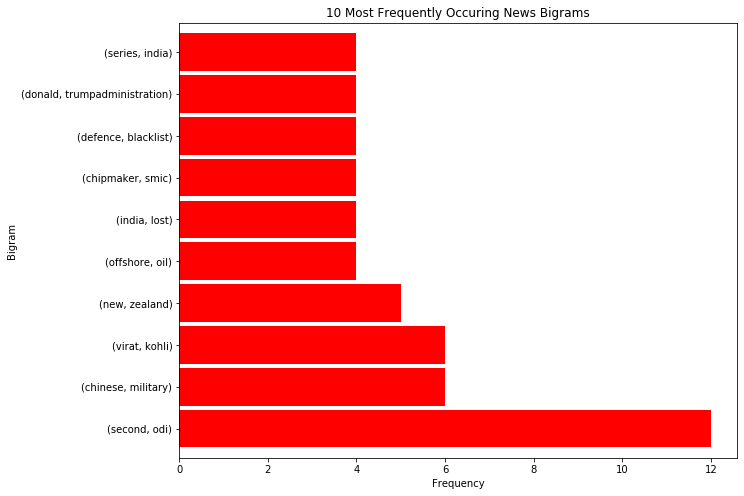

In [90]:
all_news_bigrams.head(10).plot.barh(color='red', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring News Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

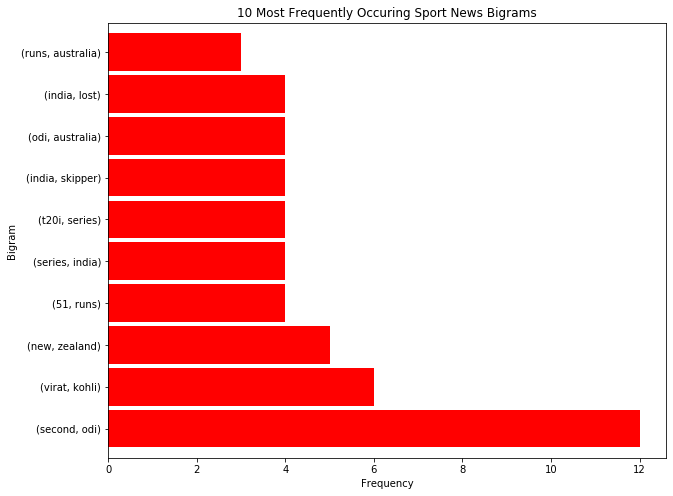

In [91]:
sport_news_bigrams.head(10).plot.barh(color='red', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring Sport News Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

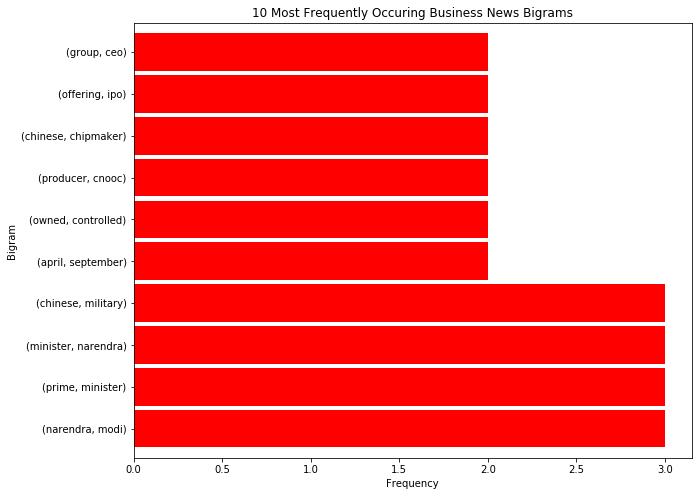

In [95]:
business_news_bigrams.head(10).plot.barh(color='red', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring Business News Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

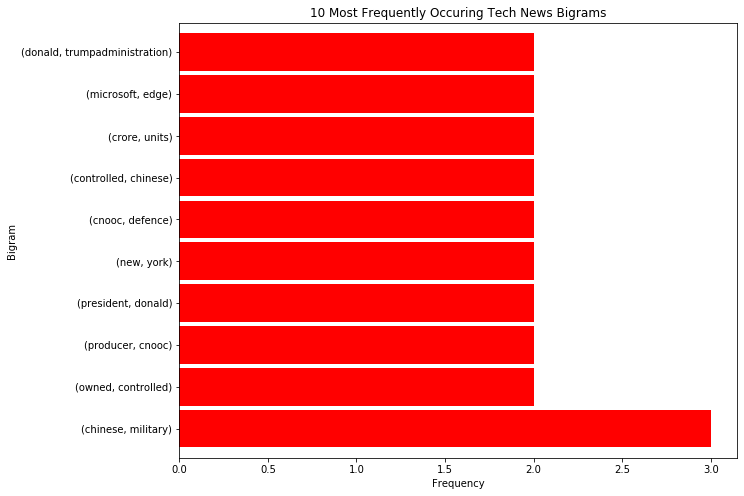

In [96]:
tech_news_bigrams.head(10).plot.barh(color='red', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring Tech News Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

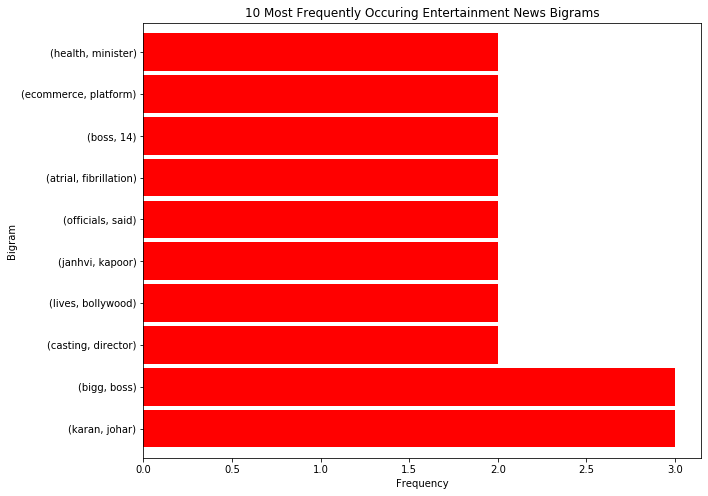

In [97]:
ent_news_bigrams.head(10).plot.barh(color='red', width=.9, figsize=(10, 8))

plt.title('10 Most Frequently Occuring Entertainment News Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')